# Test

Import usefull packages + the njord library. For installations details please refer to README file. 

In [63]:
import njord as nj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hyper parameters

In [64]:
# Dataset parameters.
PATH = "dataset"
SYMBOL = "btcusdt"
DATASET = "ohlc"
PERIOD = 600
FILENAME_TR = "binance_{}_{}_period_{}_{}.csv".format(SYMBOL, DATASET, PERIOD, "train")
FILENAME_TE = "binance_{}_{}_period_{}_{}.csv".format(SYMBOL, DATASET, PERIOD, "test")

# Batch parameters.
LOOKBACK = 16
LOOKAHEAD = 1
TARGET = "close"

## Dataset

Load the dataset from .csv file to a pandas dataframe.

In [65]:
# Load the training dataset.
data_tr = pd.read_csv(PATH + "/" + FILENAME_TR)
data_tr = data_tr.set_index("time")
data_tr.index = pd.to_datetime(data_tr.index)

# Load the test dataset.
data_te = pd.read_csv(PATH + "/" + FILENAME_TE)
data_te = data_te.set_index("time")
data_te.index = pd.to_datetime(data_te.index)

In [66]:
# Display the number of samples for the datasets.
print("Number of samples train = {}".format(data_tr.shape))
print("Number of samples test = {}".format(data_te.shape))

# Display the head of the dataset.
print("\n3. training head: \n{}".format(data_tr.head()))
print("\n3. test head: \n{}".format(data_te.head()))

Number of samples train = (8784, 5)
Number of samples test = (2736, 5)

3. training head: 
                        open     high      low    close          avg
time                                                                
2018-09-01 00:10:00  7011.21  7044.35  7010.00  7041.65  7029.350052
2018-09-01 00:20:00  7041.87  7041.87  7031.82  7038.41  7037.445636
2018-09-01 00:30:00  7038.41  7046.00  7034.72  7046.00  7041.031830
2018-09-01 00:40:00  7046.00  7049.00  7036.28  7043.81  7044.063838
2018-09-01 00:50:00  7045.42  7046.33  7030.05  7030.05  7038.251102

3. test head: 
                        open     high      low    close          avg
time                                                                
2018-11-01 00:10:00  6371.93  6376.99  6369.57  6375.15  6374.240114
2018-11-01 00:20:00  6375.19  6376.98  6372.19  6374.48  6374.350265
2018-11-01 00:30:00  6373.21  6375.00  6360.77  6366.25  6368.364441
2018-11-01 00:40:00  6366.56  6366.80  6355.00  6355.17  6361.868

## Batch and data normalisation

We now have to build the batch, i.e. a feature array X with its associated targets Y. 

- The timeseries X are normalise with the pivot method.

- The targets are casted:
    1. Y > 0 = 1, rise
    2. Y < 0 = 0, drop

In [129]:
# Load the training and test batch.
batch_tr = nj.Batch(data_tr, LOOKBACK, LOOKAHEAD)
batch_te = nj.Batch(data_te, LOOKBACK, LOOKAHEAD)

# Build the training and test batch to get the features and the targets.
X_tr, Y_tr = batch_tr.build(target="avg", method="pvt")
X_te, Y_te = batch_te.build(target="avg", method="pvt")

# Cast the targets.
Y_tr = 1.0 * ( Y_tr > 0.0 ).reshape(-1,1)
Y_te = 1.0 * ( Y_te > 0.0 ).reshape(-1,1)

In [130]:
# Display features information.
print("\nTraining Features info:")
print("X_tr shape = {}".format(X_tr.shape))
print("X_tr mean  = {}".format(X_tr.mean()))
print("X_tr std   = {}".format(X_tr.std()))
print("\nTest Features info:")
print("X_te shape = {}".format(X_te.shape))
print("X_te mean  = {}".format(X_te.mean()))
print("X_te std   = {}".format(X_te.std()))


Training Features info:
X_tr shape = (8751, 16, 5)
X_tr mean  = 0.010660262377854819
X_tr std   = 0.5791731304359717

Test Features info:
X_te shape = (2669, 16, 5)
X_te mean  = 0.07223071167349669
X_te std   = 0.5865227771674386


In [131]:
# Display targets information.
print("\nTraining Targets info:")
print("Y_tr shape = {}".format(Y_tr.shape))
print("Y_tr mean  = {}".format(Y_tr.mean()))
print("Y_tr std   = {}".format(Y_tr.std()))
print("Y_tr samples = \n{}".format(Y_tr[0:10,0]))
print("\nTest Targets info:")
print("Y_te shape = {}".format(Y_te.shape))
print("Y_te mean  = {}".format(Y_te.mean()))
print("Y_te std   = {}".format(Y_te.std()))
print("Y_te samples = \n{}".format(Y_te[0:10,0]))


Training Targets info:
Y_tr shape = (8751, 1)
Y_tr mean  = 0.5069134956005028
Y_tr std   = 0.4999522012938655
Y_tr samples = 
[0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]

Test Targets info:
Y_te shape = (2669, 1)
Y_te mean  = 0.49044585987261147
Y_te std   = 0.4999087100725754
Y_te samples = 
[1. 1. 0. 0. 1. 1. 1. 0. 0. 1.]


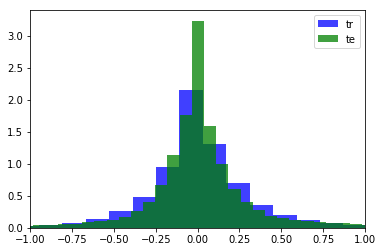

In [132]:
# Histogram: Train and test Features.
hist_X_tr = plt.hist(X_tr.reshape(-1, 1), 200, density=True, facecolor="b", alpha=0.75, label="tr")
hist_X_te = plt.hist(X_te.reshape(-1, 1), 200, density=True, facecolor="g", alpha=0.75, label="te")
plt.xlim([-1, 1])
plt.legend()
plt.show()

Number of drops tr = 4315
Number of rises tr = 4436
Number of drops te = 1360
Number of rises te = 1309


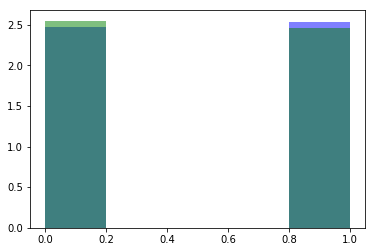

In [108]:
# Histogram: Targets.
histY = plt.hist(Y_tr, 5, density=True, facecolor="b", alpha=0.50)
histY = plt.hist(Y_te, 5, density=True, facecolor="g", alpha=0.50)

# Evalute the number of rise and drops for the training set.
print("Number of drops tr = {}".format(np.sum(Y_tr == 0)))
print("Number of rises tr = {}".format(np.sum(Y_tr == 1)))

# Evaluate the number of rise and drops for the test set.
print("Number of drops te = {}".format(np.sum(Y_te == 0)))
print("Number of rises te = {}".format(np.sum(Y_te == 1)))

## Training

Train a model with keras.

In [136]:
# Import usefull packages.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers

In [ ]:
# Build the model.
model = Sequential()
model.add(Dense(units=128, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation="sigmoid"))

# Set the optimizer.
optimizer = optimizers.RMSprop(lr=0.00025, rho=0.95, epsilon=1.0E-6, decay=0.0)

# Compile the model.
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Reshape the training dataset.
X_train = X_tr.reshape(X_tr.shape[0], -1)
Y_train = Y_tr.reshape(X_tr.shape[0], -1)

# Reshape the test dataset.
X_test = X_te.reshape(X_te.shape[0], -1)
Y_test = Y_te.reshape(X_te.shape[0], -1)

# Set the training parameters.
params = {
    "epochs": 200,
    "batch_size": 512,
    "validation_data": (X_test, Y_test)
}

# Train the model.
history = model.fit(X_train, Y_train, **params)

Train on 8751 samples, validate on 2669 samples
Epoch 1/200
8751/8751 [==============================] - 1s 81us/step - loss: 0.7063 - acc: 0.5229 - val_loss: 0.6836 - val_acc: 0.6013
Epoch 2/200
8751/8751 [==============================] - 0s 15us/step - loss: 0.6953 - acc: 0.5475 - val_loss: 0.6768 - val_acc: 0.6272
Epoch 3/200
8751/8751 [==============================] - 0s 16us/step - loss: 0.6901 - acc: 0.5655 - val_loss: 0.6723 - val_acc: 0.6242
Epoch 4/200
8751/8751 [==============================] - 0s 16us/step - loss: 0.6854 - acc: 0.5816 - val_loss: 0.6657 - val_acc: 0.6553
Epoch 5/200
8751/8751 [==============================] - 0s 15us/step - loss: 0.6778 - acc: 0.6034 - val_loss: 0.6596 - val_acc: 0.6418
Epoch 6/200
8751/8751 [==============================] - 0s 16us/step - loss: 0.6687 - acc: 0.6211 - val_loss: 0.6529 - val_acc: 0.6467
Epoch 7/200
8751/8751 [==============================] - 0s 16us/step - loss: 0.6636 - acc: 0.6267 - val_loss: 0.6447 - val_acc: 0.6587


8751/8751 [==============================] - 0s 18us/step - loss: 0.5503 - acc: 0.7251 - val_loss: 0.5451 - val_acc: 0.7227
Epoch 61/200
8751/8751 [==============================] - 0s 15us/step - loss: 0.5514 - acc: 0.7212 - val_loss: 0.5460 - val_acc: 0.7179
Epoch 62/200
8751/8751 [==============================] - 0s 15us/step - loss: 0.5515 - acc: 0.7206 - val_loss: 0.5464 - val_acc: 0.7081
Epoch 63/200
8751/8751 [==============================] - 0s 19us/step - loss: 0.5512 - acc: 0.7252 - val_loss: 0.5455 - val_acc: 0.7205
Epoch 64/200
8751/8751 [==============================] - 0s 21us/step - loss: 0.5519 - acc: 0.7195 - val_loss: 0.5462 - val_acc: 0.7074
Epoch 65/200
8751/8751 [==============================] - 0s 15us/step - loss: 0.5516 - acc: 0.7215 - val_loss: 0.5453 - val_acc: 0.7209
Epoch 66/200
8751/8751 [==============================] - 0s 15us/step - loss: 0.5508 - acc: 0.7235 - val_loss: 0.5451 - val_acc: 0.7197
Epoch 67/200
8751/8751 [==============================

Epoch 120/200
8751/8751 [==============================] - 0s 21us/step - loss: 0.5345 - acc: 0.7262 - val_loss: 0.5426 - val_acc: 0.7081
Epoch 121/200
8751/8751 [==============================] - 0s 18us/step - loss: 0.5355 - acc: 0.7305 - val_loss: 0.5410 - val_acc: 0.7171
Epoch 122/200
8751/8751 [==============================] - 0s 17us/step - loss: 0.5392 - acc: 0.7287 - val_loss: 0.5380 - val_acc: 0.7257
Epoch 123/200
8751/8751 [==============================] - 0s 18us/step - loss: 0.5370 - acc: 0.7331 - val_loss: 0.5402 - val_acc: 0.7186
Epoch 124/200
8751/8751 [==============================] - 0s 16us/step - loss: 0.5361 - acc: 0.7281 - val_loss: 0.5385 - val_acc: 0.7227
Epoch 125/200
8751/8751 [==============================] - 0s 13us/step - loss: 0.5325 - acc: 0.7280 - val_loss: 0.5382 - val_acc: 0.7246
Epoch 126/200
8751/8751 [==============================] - 0s 15us/step - loss: 0.5346 - acc: 0.7312 - val_loss: 0.5399 - val_acc: 0.7209
Epoch 127/200
8751/8751 [=========

8751/8751 [==============================] - 0s 13us/step - loss: 0.5273 - acc: 0.7335 - val_loss: 0.5433 - val_acc: 0.7152
Epoch 180/200
8751/8751 [==============================] - 0s 12us/step - loss: 0.5240 - acc: 0.7345 - val_loss: 0.5415 - val_acc: 0.7175
Epoch 181/200
8751/8751 [==============================] - 0s 13us/step - loss: 0.5238 - acc: 0.7348 - val_loss: 0.5450 - val_acc: 0.7134
Epoch 182/200
8751/8751 [==============================] - 0s 13us/step - loss: 0.5266 - acc: 0.7349 - val_loss: 0.5430 - val_acc: 0.7152
Epoch 183/200
8751/8751 [==============================] - 0s 14us/step - loss: 0.5204 - acc: 0.7387 - val_loss: 0.5429 - val_acc: 0.7145
Epoch 184/200
8751/8751 [==============================] - 0s 13us/step - loss: 0.5199 - acc: 0.7352 - val_loss: 0.5415 - val_acc: 0.7134
Epoch 185/200
8751/8751 [==============================] - 0s 13us/step - loss: 0.5270 - acc: 0.7371 - val_loss: 0.5443 - val_acc: 0.7078
Epoch 186/200
8751/8751 [=======================

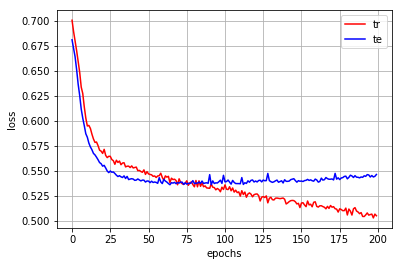

In [142]:
# Figure: loss vs epochs.
plt.figure()
plt.plot(history.history["loss"], label="tr", color="r")
plt.plot(history.history["val_loss"], label="te", color="b")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

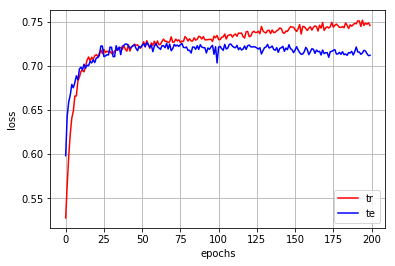

In [143]:
# Figure: accuracy vs. epochs.
plt.figure()
plt.plot(history.history["acc"], label="tr", color="r")
plt.plot(history.history["val_acc"], label="te", color="b")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()